# Logistic Regression (Model & Predict)

## 2) MNIST

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
from sklearn.datasets import fetch_mldata

In [33]:
mnist=fetch_mldata('MNIST original')

In [34]:
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

In [35]:
mnist.data.shape,mnist.target.shape

((70000, 784), (70000,))

In [36]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
Xtrain, Xtest,Ytrain, Ytest = train_test_split(mnist.data,mnist.target,test_size=0.20,random_state=0)
Xtrain.shape, Xtest.shape, Ytrain.shape,Ytest.shape

((56000, 784), (14000, 784), (56000,), (14000,))

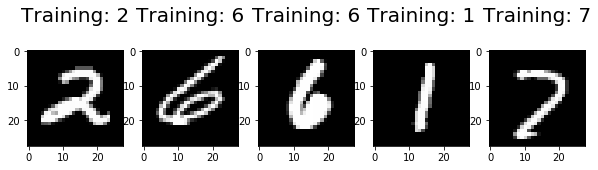

In [39]:
plt.figure(figsize=(10,12))
for index, (image, label) in enumerate(zip(Xtrain[100:105], Ytrain[100:105])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [40]:
model = LogisticRegression(solver = 'lbfgs')

In [41]:
model.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
print('Train Score:',model.score(Xtrain,Ytrain))
print('Test Score:',model.score(Xtest,Ytest))

Train Score: 0.9278928571428572
Test Score: 0.9132857142857143


In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
pred_mnist = model.predict(Xtest)
confusion_matrix(Ytest,pred_mnist) #diagonal are properly defined

array([[1277,    0,    4,    3,    4,    3,   10,    1,    8,    2],
       [   0, 1551,   11,    4,    1,    5,    4,    3,   20,    5],
       [   8,   16, 1204,   23,   14,    4,   17,   18,   39,    5],
       [   4,   11,   39, 1276,    1,   32,    3,    7,   39,   15],
       [   4,    5,    9,    3, 1246,    2,   17,    3,   13,   60],
       [  12,    4,   13,   53,   15, 1088,   24,    6,   47,   18],
       [  10,    2,    6,    1,    6,   13, 1351,    0,    7,    1],
       [  10,    4,   20,    4,   16,    1,    0, 1348,    6,   52],
       [   8,   27,   16,   42,    8,   41,    9,    7, 1209,   23],
       [  12,    3,    9,   31,   61,    8,    1,   41,   17, 1236]],
      dtype=int64)

In [45]:
print(classification_report(Ytest,pred_mnist))

             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96      1312
        1.0       0.96      0.97      0.96      1604
        2.0       0.90      0.89      0.90      1348
        3.0       0.89      0.89      0.89      1427
        4.0       0.91      0.91      0.91      1362
        5.0       0.91      0.85      0.88      1280
        6.0       0.94      0.97      0.95      1397
        7.0       0.94      0.92      0.93      1461
        8.0       0.86      0.87      0.87      1390
        9.0       0.87      0.87      0.87      1419

avg / total       0.91      0.91      0.91     14000



In [46]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(Ytest, pred_mnist):
    if label != predict:
        misclassifiedIndexes.append(index)
        index +=1

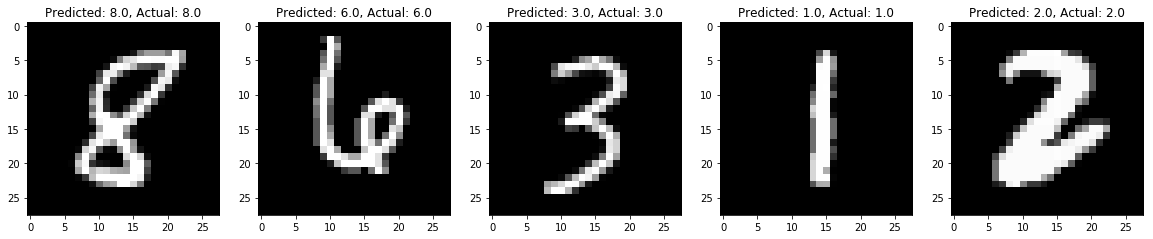

In [54]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[70:75]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(Xtest[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(pred_mnist[badIndex], Ytest[badIndex]), fontsize = 12)